In [2]:
pip install keras

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------- -------------- 30.7/48.7 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ------- -------------------------------- 0.2/1.2 MB 4.8 MB/s eta 0:00:01
   ----------------------------- ---------- 0.9/1.2 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 9.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.7 kB ? eta -:--:--
   ---------------------------------------- 133.7/133.7 kB ? eta 0:00:00
   ---------------------------------------- 0.0/211.9 kB ? eta -:--:--
   --------------------------------------- 211.9/211.9 kB 12.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/292.2 kB ? eta -:--:--
   ---------------------------------------- 292.2/292.2 kB 8.8 MB/s eta 0:00:00
Note: you may need to res

In [4]:
pip install tensorflow

   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.2/390.2 MB 4.1 MB/s eta 0:01:35
   ---------------------------------------- 0.7/390.2 MB 7.6 MB/s eta 0:00:52
   ---------------------------------------- 1.5/390.2 MB 10.2 MB/s eta 0:00:38
   ---------------------------------------- 2.2/390.2 MB 11.5 MB/s eta 0:00:34
   ---------------------------------------- 2.9/390.2 MB 12.3 MB/s eta 0:00:32
   ---------------------------------------- 3.6/390.2 MB 12.8 MB/s eta 0:00:31
   ---------------------------------------- 4.4/390.2 MB 13.3 MB/s eta 0:00:29
    --------------------------------------- 5.1/390.2 MB 13.6 MB/s eta 0:00:29
    --------------------------------------- 5.8/390.2 MB 13.7 MB/s eta 0:00:28
    --------------------------------------- 6.6/390.2 MB 14.0 MB/s eta 0:00:28
    --------------------------------------- 7.3/390.2 MB 14.1 MB/s eta 0:00:28
    --------------------------------------- 8.1/390.2 MB 14.3 

## Importando librerías

In [5]:
from keras.datasets import mnist
from keras import layers, models
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

## Nuestro set de datos

In [6]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
train_data.shape

(60000, 28, 28)

In [8]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<function matplotlib.pyplot.show(close=None, block=None)>

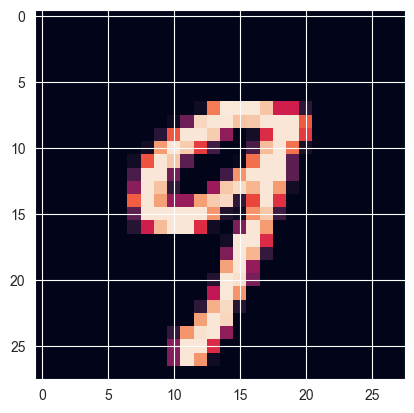

In [9]:
plt.imshow(train_data[45])
plt.show

In [10]:
train_labels[45]

9

## Creando un modelo de datos

In [11]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))#28 * 28 por la dimensions que manejan las imagenes.
model.add(layers.Dense(10,activation='softmax'))#porque 10 neuronas? porque nosotros tenemos 10 posibles salidas.

C:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Limpieza de datos

In [14]:
x_train = train_data.reshape((60000,28*28))# esto hacemos para hacerlo de dos dimensiones, porque la info originalmente viene en 3 dimensiones.
x_train = x_train.astype('float32')/255# es mucho mas facil para una red neuronal trabajar con decimales. 255 porque habiamos dicho que ese era el valor maximo que podia tener cada pixel.

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [15]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [16]:
train_labels[0]

5

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

## Entrenando el modelo

In [18]:
model.fit(x_train, y_train, epochs=5, batch_size=128)# 5 iteraciones, con lotes de 128

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8735 - loss: 0.4411
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9650 - loss: 0.1176
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9781 - loss: 0.0721
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9852 - loss: 0.0515
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9883 - loss: 0.0390


## Evaluando sobre data de test

In [19]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9767 - loss: 0.0786


[0.06470903009176254, 0.9801999926567078]